In [79]:
import datetime

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('company_stock.csv', index_col = 'Date', parse_dates=True)
close_px = df['Close']#assign close price 
close_px.shift(-1)
rets = close_px / close_px.shift(-1) - 1 
rets.head()
df['Rate_of_Return'] = rets #add rets to df as a column
df
df1 = df.loc[:,['Close','Rate_of_Return','Volume','Company_ticker','Dis_category']]
df1

,Close,Rate_of_Return,Volume,Company_ticker,Dis_category
Date,,,,,
2017-10-24,26.23,-0.017235,5339512.0,FOXA,Studio_Entertainment
2017-10-23,26.69,-0.029455,5644300.0,FOXA,Studio_Entertainment
2017-10-20,27.50,0.004750,8879892.0,FOXA,Studio_Entertainment
2017-10-19,27.37,0.006990,5743185.0,FOXA,Studio_Entertainment
2017-10-18,27.18,0.011161,8363299.0,FOXA,Studio_Entertainment
2017-10-17,26.88,0.007119,4726561.0,FOXA,Studio_Entertainment
2017-10-16,26.69,0.006410,5916967.0,FOXA,Studio_Entertainment
2017-10-13,26.52,0.014537,9834312.0,FOXA,Studio_Entertainment
2017-10-12,26.14,0.001149,13160657.0,FOXA,Studio_Entertainment


In [80]:
###Analysis for all related companies### 

#close price 
test = pd.DataFrame(df1).reset_index()
df1_pivot = test.pivot(index = 'Date', columns = 'Company_ticker', values = 'Close')
df1_pivot = df1_pivot.dropna(how = 'all')
df1_pivot = df1_pivot['2010-01-01':'2017-12-24']
df1_pivot.head()

Company_ticker,AAL,AMCX,AMD,AMZN,BOALF,BT,CBS,CCO,CMCSA,DIS,...,SBUX,SEAS,SIX,SNE,T,TGT,TSN,TWX,VIAB,VZ
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,20.67,NaN,9.70,133.90,NaN,11.13,14.25,10.53,8.49,32.07,...,11.53,NaN,NaN,30.02,28.58,48.55,12.24,28.21,29.98,31.11
2010-01-05,22.38,NaN,9.71,134.69,NaN,11.32,14.18,10.58,8.37,31.99,...,11.80,NaN,NaN,29.88,28.44,48.73,12.47,27.89,30.04,31.17
2010-01-06,21.71,NaN,9.57,132.25,NaN,11.57,13.73,10.57,8.31,31.82,...,11.71,NaN,NaN,29.85,27.61,49.66,13.10,27.82,29.89,29.84
2010-01-07,22.09,NaN,9.47,130.00,NaN,11.37,14.00,10.60,8.49,31.83,...,11.68,NaN,NaN,29.80,27.30,50.27,13.33,27.53,30.20,29.67
2010-01-08,21.71,NaN,9.43,133.52,NaN,11.42,14.15,11.19,8.46,31.88,...,11.64,NaN,NaN,30.41,27.10,50.07,13.30,27.57,30.04,29.68


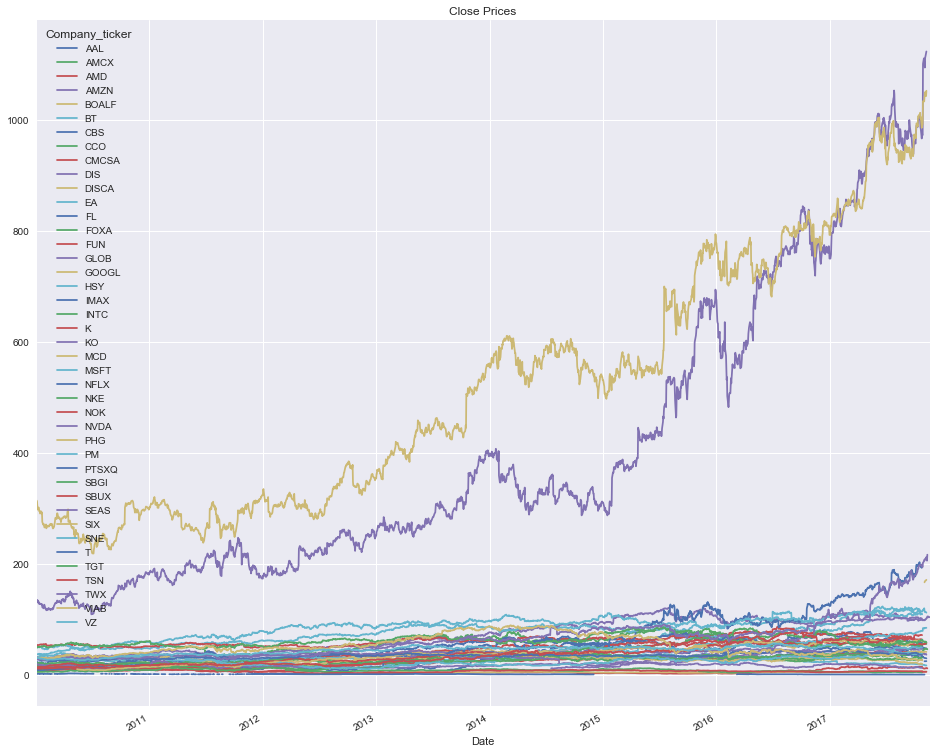

In [82]:
#plt.plot(df1_pivot)
df1_pivot.plot(figsize=(16,14), title = 'Close Prices')
plt.show()

In [61]:
# rate of return 

df2_pivot = test.pivot(index = 'Date', columns = 'Company_ticker', values = 'Rate_of_Return')
df2_pivot = df2_pivot.dropna(how = 'all')
df2_pivot = df2_pivot['2010-01-01':'2017-12-24']
df2_pivot.head()

Company_ticker,AAL,AMCX,AMD,AMZN,BOALF,BT,CBS,CCO,CMCSA,DIS,...,SBUX,SEAS,SIX,SNE,T,TGT,TSN,TWX,VIAB,VZ
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,-0.001449,NaN,0.002066,-0.004609,NaN,0.023919,-0.770900,-0.771979,-0.559190,-0.005581,...,0.000000,NaN,NaN,-0.475358,4.149550,0.003721,-0.749898,-0.603569,0.008409,0.220958
2010-01-05,0.082729,NaN,0.001031,0.005900,NaN,0.017071,-0.004912,0.004748,-0.014134,-0.002495,...,0.023417,NaN,NaN,-0.004664,-0.004899,0.003708,0.018791,-0.011343,0.002001,0.001929
2010-01-06,-0.029937,NaN,-0.014418,-0.018116,NaN,0.022085,-0.031735,-0.000945,-0.007168,-0.005314,...,-0.007627,NaN,NaN,-0.001004,-0.029184,0.019085,0.050521,-0.002510,-0.004993,-0.042669
2010-01-07,0.017503,NaN,-0.010449,-0.017013,NaN,-0.017286,0.019665,0.002838,0.021661,0.000314,...,-0.002562,NaN,NaN,-0.001675,-0.011228,0.012284,0.017557,-0.010424,0.010371,-0.005697
2010-01-08,-0.017202,NaN,-0.004224,0.027077,NaN,0.004398,0.010714,0.055660,-0.003534,0.001571,...,-0.003425,NaN,NaN,0.020470,-0.007326,-0.003979,-0.002251,0.001453,-0.005298,0.000337


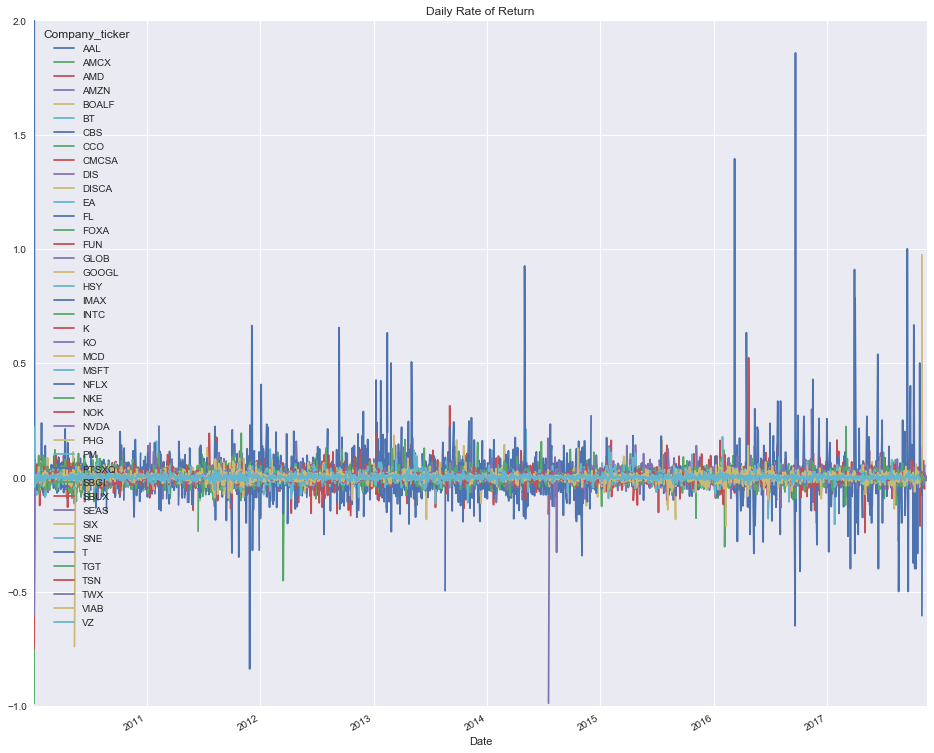

In [91]:
df2_pivot.plot(figsize=(16,14), title = 'Daily Rate of Return')
plt.ylim(-1, 2)
plt.show()

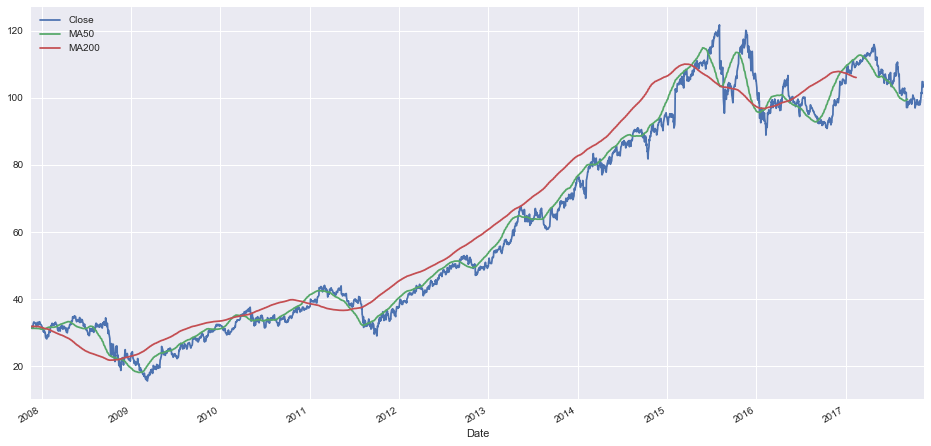

In [113]:
#Disney stock analysis

df_disney=df1.copy()
df_disney = df_disney.loc[df1['Dis_category']== 'Disney']#get disney data
#print(df_disney)

df_disney['MA50'] = df_disney['Close'].rolling(50).mean()
df_disney['MA200'] = df_disney['Close'].rolling(200).mean()
df_disney[['Close','MA50','MA200']].plot(figsize=(16,8))
plt.show()

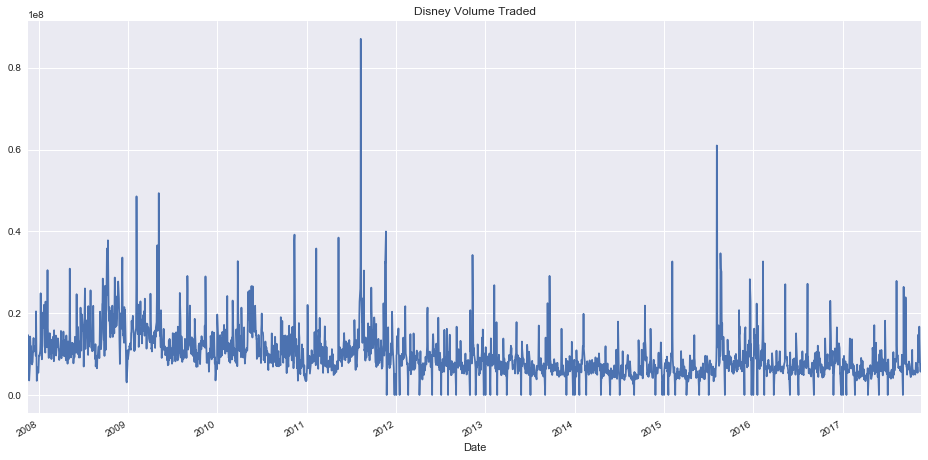

In [116]:
df_disney['Volume'].plot(label='Disney',figsize=(16,8),title='Disney Volume Traded')
plt.show()

In [117]:
df_disney['Volume'].argmax()

Timestamp('2011-08-10 00:00:00')

In [63]:
###Select one field : Studio Entertainment

df3 = df1.loc[df1['Dis_category'].isin(['Disney','Studio_Entertainment'])] 
df3.head()

,Close,Rate_of_Return,Company_ticker,Dis_category
Date,,,,
2017-10-24,26.23,-0.017235,FOXA,Studio_Entertainment
2017-10-23,26.69,-0.029455,FOXA,Studio_Entertainment
2017-10-20,27.50,0.004750,FOXA,Studio_Entertainment
2017-10-19,27.37,0.006990,FOXA,Studio_Entertainment
2017-10-18,27.18,0.011161,FOXA,Studio_Entertainment


In [30]:
#close price 
test2 = pd.DataFrame(df3).reset_index()
df3_pivot = test2.pivot(index = 'Date', columns = 'Company_ticker', values = 'Close')
df3_piot = df3_pivot.dropna(how = 'all')
df3_pivot = df3_pivot['2010-01-01':'2017-12-24']
df3_pivot.head()

Company_ticker,AMCX,CMCSA,DIS,FOXA,SNE,TWX,VIAB
Date,,,,,,,
2010-01-04,NaN,8.49,32.07,12.10,30.02,28.21,29.98
2010-01-05,NaN,8.37,31.99,12.13,29.88,27.89,30.04
2010-01-06,NaN,8.31,31.82,12.33,29.85,27.82,29.89
2010-01-07,NaN,8.49,31.83,12.16,29.80,27.53,30.20
2010-01-08,NaN,8.46,31.88,12.26,30.41,27.57,30.04


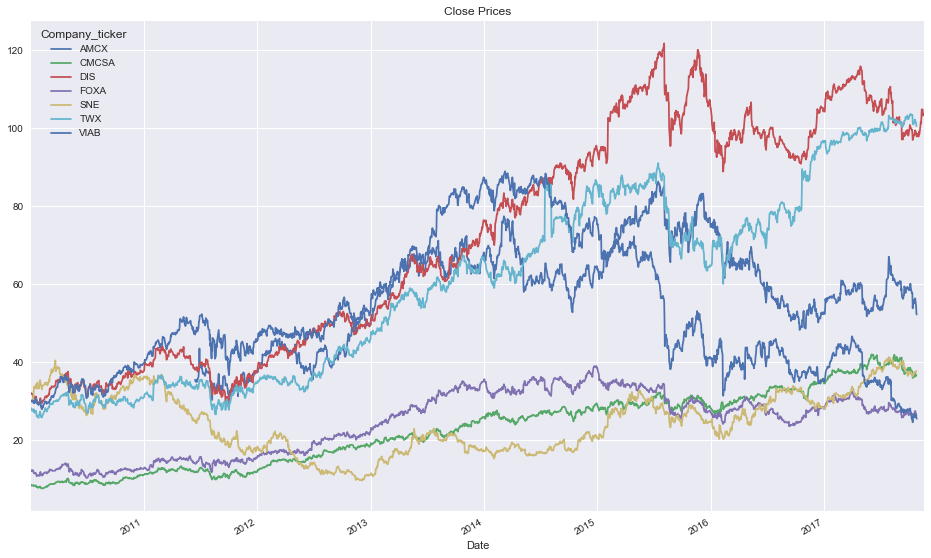

In [89]:
#plt.plot(df3_pivot)
df3_pivot.plot(figsize=(16,10), title = 'Close Prices')
l1 = plt.plot()
plt.show()

In [68]:
df4_pivot = test2.pivot(index = 'Date', columns = 'Company_ticker', values = 'Rate_of_Return')
df4_pivot = df4_pivot.dropna(how = 'all')
df4_pivot = df4_pivot['2010-01-01':'2017-12-24']
cols = df4_pivot.columns.tolist()
cols = cols
#df4_pivot.head()

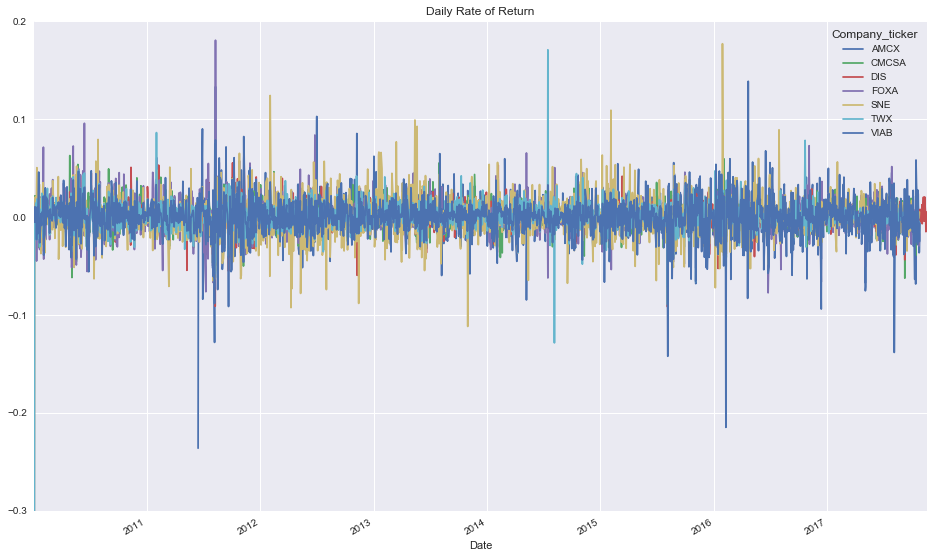

In [90]:
df4_pivot.plot(figsize=(16,10), title = 'Daily Rate of Return')
plt.ylim(-0.3, 0.2)
l1 = plt.plot()
plt.show()

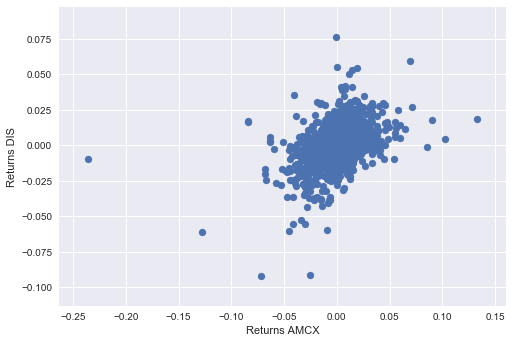

In [70]:
plt.scatter(df4_pivot['AMCX'], df4_pivot['DIS'])
plt.xlabel('Returns AMCX')
plt.ylabel('Returns DIS')
plt.show()

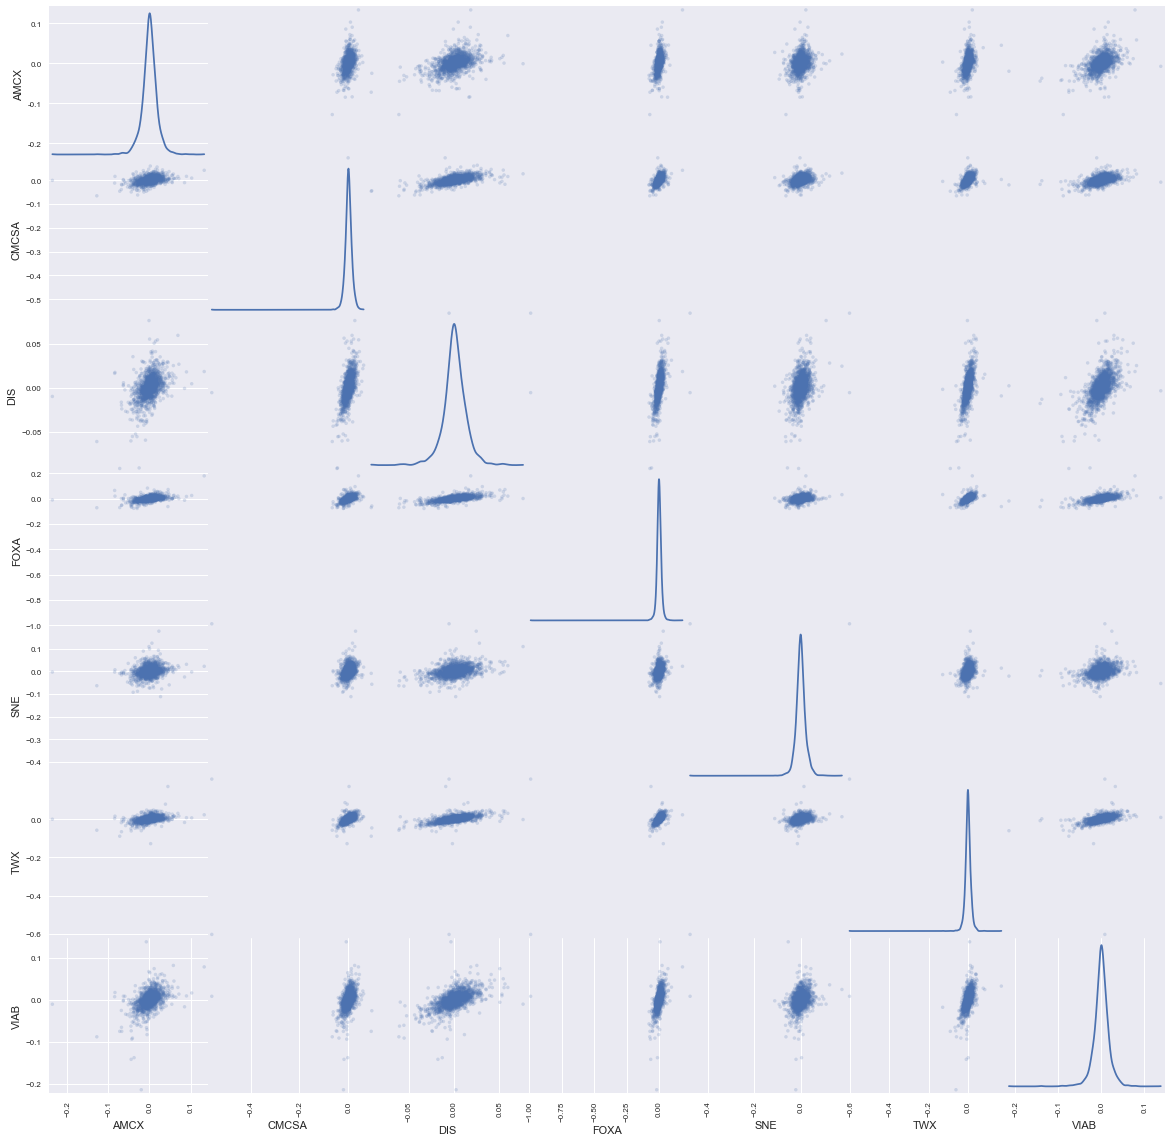

In [115]:
colMap = {}
sm = pd.plotting.scatter_matrix(df4_pivot, diagonal = 'kde', figsize = (20, 20),alpha=0.2)
plt.show()

In [38]:
corr = df4_pivot.corr()
corr

Company_ticker,AMCX,CMCSA,DIS,FOXA,SNE,TWX,VIAB
Company_ticker,,,,,,,
AMCX,1.000000,0.404103,0.430510,0.457377,0.227832,0.405842,0.451165
CMCSA,0.404103,1.000000,0.453606,0.789034,0.533170,0.754271,0.347038
DIS,0.430510,0.453606,1.000000,0.400649,0.346735,0.442813,0.565676
FOXA,0.457377,0.789034,0.400649,1.000000,0.533638,0.793014,0.351051
SNE,0.227832,0.533170,0.346735,0.533638,1.000000,0.517943,0.255201
TWX,0.405842,0.754271,0.442813,0.793014,0.517943,1.000000,0.400978
VIAB,0.451165,0.347038,0.565676,0.351051,0.255201,0.400978,1.000000


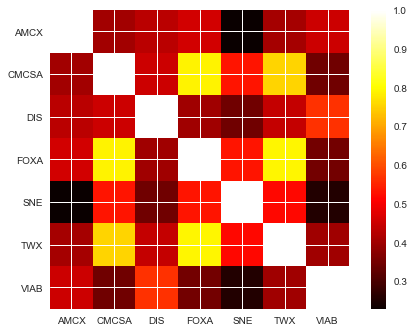

In [39]:
plt.imshow(corr, cmap = 'hot', interpolation = 'none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

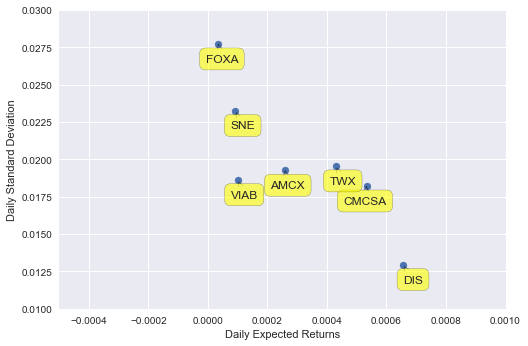

In [40]:
plt.scatter(df4_pivot.mean(), df4_pivot.std())
plt.xlim(-0.0005, 0.001)
plt.ylim(0.010, 0.030)
plt.xlabel('Daily Expected Returns')
plt.ylabel('Daily Standard Deviation')
for label, x, y in zip(df4_pivot.columns, df4_pivot.mean(), df4_pivot.std()):
    plt.annotate(
        label, xy = (x, y), xytext = (20,-20), textcoords = 'offset points', ha = 'right', 
        va = 'bottom', bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.6),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()